In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

## Fetching Dataset

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784')

In [4]:
x, y= mnist['data'],mnist['target']

In [5]:
x.shape

(70000, 784)

In [6]:
x1 =x.to_numpy()

In [7]:
x1[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [8]:
y1=y.to_numpy()

In [9]:
y1

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [10]:
y1.shape

(70000,)

In [11]:
x1.shape

(70000, 784)

In [12]:
# let us save the data
data = pd.DataFrame(x1)
label = pd.DataFrame(y1)

In [13]:
data.to_csv('data.csv')
label.to_csv('label.csv')

In [14]:
some_digit = x1[36000]
some_digit_image = some_digit.reshape(28,28) # lets reshape to plot it

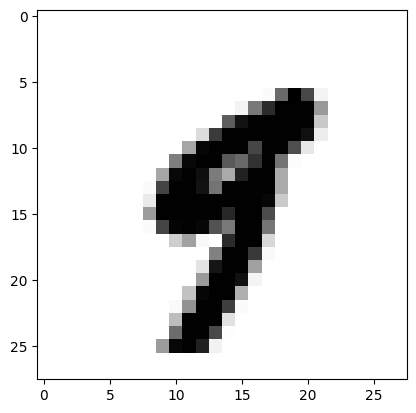

In [15]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

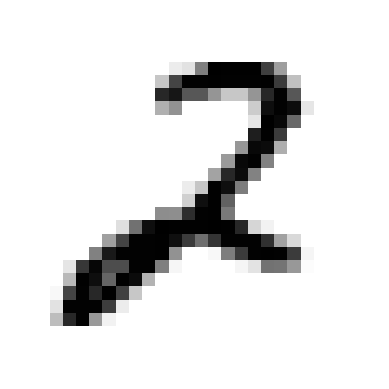

In [16]:
some_digit_1 = x1[36001]
some_digit_image_1 = some_digit_1.reshape(28,28) # lets reshape to plot it
plt.imshow(some_digit_image_1, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [17]:
y1[36001]

'2'

In [18]:
y1[36000]

'9'

In [19]:
# first 60,000 are training and rest 10,000 are test

In [20]:
x_train, x_test = x1[:60000],x1[60000:]

In [21]:
y_train, y_test = y1[:60000],y1[60000:]

In [22]:
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

## Creating a 2 detector

In [23]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [24]:
y_train

array([0, 0, 0, ..., 0, 8, 5], dtype=int8)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf = LogisticRegression(tol=0.1)

can use solver='lbfgs' to suppress warnings next to tol, i.e.LogisticRegression(tol=0.1, solver='lbfgs')

In [27]:
clf.fit(x_train, y_train_2)

LogisticRegression(tol=0.1)

In [28]:
clf.predict([some_digit])

array([False])

In [29]:
clf.predict([some_digit_1])

array([ True])

In [30]:
clf.score(x_train, y_train_2)*100

98.05333333333334

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring='accuracy')

- cross_val_score divides train group into n groups and uses one as test, to check accuracy and then sets the other group as test and checks errors for each divided group.
- above we have chosen cv=3, therefore, data will be divided into 3 groups and 3 accuracy scores will be brought

In [78]:
a

array([0.97885, 0.9794 , 0.9784 ])

In [33]:
a.mean()

0.9788833333333334

This is our accuracy. 0.9788833333333334

In [34]:
# TODO: create a classifier which will classify a digit as 'not 2'

In [35]:
# accuracy is not a good metric to evaluate a classifier for example skewed datasets

In [36]:
from sklearn.model_selection import cross_val_predict

In [37]:
y_train_pred = cross_val_predict(clf, x_train, y_train_2, cv=3)

In [38]:
y_train_pred

array([False, False, False, ..., False, False, False])

In [53]:
(pd.DataFrame(y_train_pred))[0].unique()

array([False,  True])

In [44]:
pd.DataFrame(y_train_pred)

,0
0,False
1,False
2,False
3,True
4,False
...,...
59995,False
59996,False
59997,False
59998,False


In [55]:
(pd.DataFrame(y_train_pred))[0].value_counts()

False    54477
True      5523
Name: 0, dtype: int64

### Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
confusion_matrix(y_train_2, y_train_pred)

array([[53626,   416],
       [  851,  5107]], dtype=int64)

In [58]:
confusion_matrix(y_train_2, y_train_2)

array([[54042,     0],
       [    0,  5958]], dtype=int64)

This is the ideal confusion matrix.

### Precision and Recall

from sklearn.metrics import precision_score, recall_score

In [60]:
precision_score(y_train_2, y_train_pred)

0.9246786166938258

In [61]:
recall_score(y_train_2, y_train_pred)

0.8571668345082243

### F1-Score

In [62]:
from sklearn.metrics import f1_score

In [66]:
f1_score(y_train_2, y_train_pred)

0.8896437592544203

In [65]:
(2*precision_score(y_train_2, y_train_pred)*recall_score(y_train_2, y_train_pred))/(precision_score(y_train_2, y_train_pred)+recall_score(y_train_2, y_train_pred))

0.8896437592544203

### Precision Recall Curve

In [67]:
from sklearn.metrics import precision_recall_curve

In [69]:
y_scores = cross_val_predict(clf, x_train, y_train_2, cv=3, method='decision_function')

In [70]:
y_scores

array([ -4.98750594,  -9.072181  , -13.92662636, ...,  -9.19992156,
        -8.18937675, -13.76261803])

In [71]:
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

In [72]:
precisions

array([0.0993    , 0.09930166, 0.09930331, ..., 1.        , 1.        ,
       1.        ])

In [74]:
recall

In [ ]:
[0.0993     0.09930166 0.09930331 ... 1.         1.         1.        ]

In [75]:
thresholds

array([-37.55168929, -37.44484939, -35.24888721, ...,  16.21511631,
        16.44553368,  17.52116531])

### Plotting the Precision Recall Curve

Precision recall curve method returns arrays of precision and recall which have extra elements of 0 and 1 added to the end, therefore, we slice to remove them to plot. 

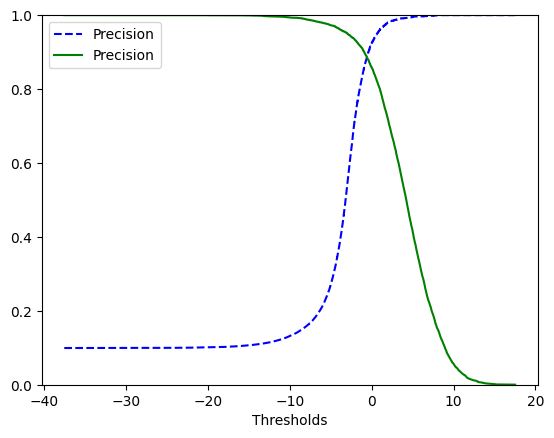

In [77]:
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Precision')
plt.xlabel("Thresholds")
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

### stochastic gradient descent classifier is better to use than logistic regression